In [5]:
pip install tensorflow

     |████████████████▉               | 310.0 MB 63.3 MB/s eta 0:00:053     |█████████▎                      | 170.2 MB 132.8 MB/s eta 0:00:04

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |███████████████████████▋        | 434.6 MB 133.8 MB/s eta 0:00:02

     |████████████████████████        | 441.3 MB 133.8 MB/s eta 0:00:02

     |████████████████████████▍       | 447.6 MB 133.8 MB/s eta 0:00:02

     |████████████████████████▊       | 454.1 MB 133.8 MB/s eta 0:00:02

     |█████████████████████████       | 460.6 MB 133.8 MB/s eta 0:00:01

     |█████████████████████████▍      | 466.6 MB 133.8 MB/s eta 0:00:01

     |█████████████████████████▊      | 473.0 MB 123.5 MB/s eta 0:00:01

     |██████████████████████████      | 478.9 MB 123.5 MB/s eta 0:00:01

     |██████████████████████████▍     | 485.8 MB 123.5 MB/s eta 0:00:01

     |██████████████████████████▊     | 491.8 MB 123.5 MB/s eta 0:00:01

     |███████████████████████████▏    | 498.6 MB 123.5 MB/s eta 0:00:01

     |███████████████████████████▍    | 504.2 MB 123.5 MB/s eta 0:00:01

     |███████████████████████████▉    | 510.8 MB 123.5 MB/s eta 0:00:01

     |████████████████████████████    | 516.6 MB 123.5 MB/s eta 0:00:01

     |████████████████████████████▏   | 517.9 MB 123.5 MB/s eta 0:00:01

     |████████████████████████████████| 588.3 MB 5.4 kB/s ta 0:00:01
     |████████████████████████████████| 133 kB 108.7 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 101.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 90.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 49.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 63.7 MB/s eta 0:00:01
     |████████████████████████████████| 22.9 MB 101.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 18.7 MB/s eta 0:00:01
     |████████████████████████████████| 439 kB 92.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 45.0 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 103.9 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 62.8 MB/s eta 0:00:01
     |█████████████████████████

Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf

In [7]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [8]:
class DQNAgent:
    # Initialization of the DQN Agent
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []
        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    # Define the model architecture    
    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential() # Sequential model is a linear stack of layers
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    # Store experiences in replay memory
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    # Decide on an action    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    # Training the model with experiences sampled from memory
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [9]:
class TicTacToe:
    def __init__(self):
        self.board = [' ' for _ in range(9)]  # 3x3 board
        self.current_winner = None  # Track the winner!

    def print_board(self):
        for row in [self.board[i*3:(i+1)*3] for i in range(3)]:
            print('| ' + ' | '.join(row) + ' |')

    def available_moves(self):
        return [i for i, x in enumerate(self.board) if x == ' ']

    def empty_cells(self):
        return ' ' in self.board

    def make_move(self, square, letter):
        if self.board[square] == ' ':
            self.board[square] = letter
            if self.check_winner(square, letter):
                self.current_winner = letter
            return True
        return False

    def check_winner(self, square, letter):
        # Check row
        row_ind = square // 3
        row = self.board[row_ind*3:(row_ind+1)*3]
        if all([s == letter for s in row]):
            return True

        # Check column
        col_ind = square % 3
        column = [self.board[col_ind + i*3] for i in range(3)]
        if all([s == letter for s in column]):
            return True

        # Check diagonals
        if square % 2 == 0:
            diagonal1 = [self.board[i] for i in [0, 4, 8]]
            if all([s == letter for s in diagonal1]):
                return True
            diagonal2 = [self.board[i] for i in [2, 4, 6]]
            if all([s == letter for s in diagonal2]):
                return True

        return False
    
    def get_state(self):
        state = []
        for cell in self.board:
            if cell == 'X':
                state.append(1)
            elif cell == 'O':
                state.append(-1)
            else:
                state.append(0)
        return np.array([state])

In [10]:
def train_dqn_agent(episodes, batch_size):
    agent = DQNAgent(state_size=9, action_size=9)
    for e in range(episodes):
        # Initialize the Tic Tac Toe game
        game = TicTacToe()
        state = game.get_state()

        for time in range(9):  # Maximum of 9 moves in Tic Tac Toe
            action = agent.act(state)
            if action not in game.available_moves():
                reward = -10  # Penalty for invalid move
                done = True
            else:
                game.make_move(action, 'X')  # DQN agent plays as 'X'
                next_state = game.get_state()
                reward = 0
                done = game.current_winner is not None

                if not done:
                    # Random opponent move
                    opponent_move = random.choice(game.available_moves())
                    game.make_move(opponent_move, 'O')
                    next_state = game.get_state()
                    done = game.current_winner is not None
                    if done:
                        reward = -10  # Penalty if opponent wins

                if done and game.current_winner == 'X':
                    reward = 10  # Reward for winning

            agent.remember(state, action, reward, next_state, done)
            state = next_state

            if done:
                break

        agent.replay(batch_size)
        
    # Save the model weights
    agent.model.save_weights('dqn_agent_weights.h5')
    return agent


In [11]:
if __name__ == "__main__":
    episodes = 10  # Number of games to play
    batch_size = 2  # Training batch size
    train_dqn_agent(episodes, batch_size)

1/1 [==============================] - 0s 17ms/step


In [12]:
# Initialize a new DQN agent
agent_for_playing = DQNAgent(state_size=9, action_size=9)

# Load the previously saved weights
agent_for_playing.model.load_weights('dqn_agent_weights.h5')

# Now we can use agent_for_playing to play the game


Defining a random move player

In [13]:
class RandomPlayer:
    def __init__(self, letter):
        self.letter = letter

    def get_move(self, game):
        return random.choice(game.available_moves())


Setting up the game play function

In [14]:
def play_game(dqn_agent, game, verbose=False):
    current_player = 'O'  # Start with player 'O', which is the random player

    while game.empty_cells():
        if game.current_winner:
            # Game has been won
            if verbose:
                print(f"Player {game.current_winner} wins!")
            return game.current_winner

        # Determine the move based on the current player
        if current_player == 'X':
            # DQN agent's turn
            state = game.get_state()
            action = dqn_agent.act(state)
        else:
            # Random player's turn
            action = RandomPlayer('O').get_move(game)

        # Check if the move is valid
        if action not in game.available_moves():
            # Invalid move by DQN agent, random player wins
            if current_player == 'X':
                return 'O'
            else:
                # Invalid move by random player, DQN agent wins
                return 'X'

        # Make the move
        game.make_move(action, current_player)

        # Switch turns
        current_player = 'X' if current_player == 'O' else 'O'

        # Optionally, print the board
        if verbose:
            game.print_board()

    if verbose:
        print("It's a tie!")

    return 'Draw'

Playing the Game

In [15]:
if __name__ == "__main__":
    dqn_agent = agent_for_playing
    game = TicTacToe()
    result = play_game(dqn_agent, game, verbose=True)
    print("Game result:winner is ", result)

|   |   | O |
|   |   |   |
|   |   |   |
|   |   | O |
|   |   | X |
|   |   |   |
|   |   | O |
|   | O | X |
|   |   |   |
Game result:winner is  O


### Testing 

In [17]:
state_size = 9  # Example for Tic Tac Toe
action_size = 9  # Example for Tic Tac Toe

agent = DQNAgent(state_size, action_size)


In [21]:
# Test that experiences are stored in the agent's memory correctly
initial_memory_len = len(agent.memory)
agent.remember([1, 2, 3, 4, 5], 2, 1, [1, 2, 3, 4, 6], False)
assert len(agent.memory) == initial_memory_len + 1, "Memory storage failed"

print("Test passed: Memory storage is functioning correctly.")

Test passed: Memory storage is functioning correctly.


Test Action Selection (Exploration vs. Exploitation)

In [27]:
import numpy as np

# Set the agent to always explore
agent_for_playing.epsilon = 1.0

# Initialize game state
game = TicTacToe()
state = game.get_state().reshape(1, -1)  # Reshape the state for the model

# Test exploration
action = agent_for_playing.act(state)
assert action in game.available_moves(), "The agent did not explore as expected."






In [28]:
# Set the agent to always exploit
agent_for_playing.epsilon = 0.0

# Assuming the model is trained and the state is initialized
action = agent_for_playing.act(state)
# Note: Verifying exploitation requires knowing the best action from the current state,
# which might require a trained model or manual verification based on known best actions.

print("Selected action:", action)



1/1 [==============================] - 0s 50ms/step
Selected action: 5


### Performance Evaluation

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


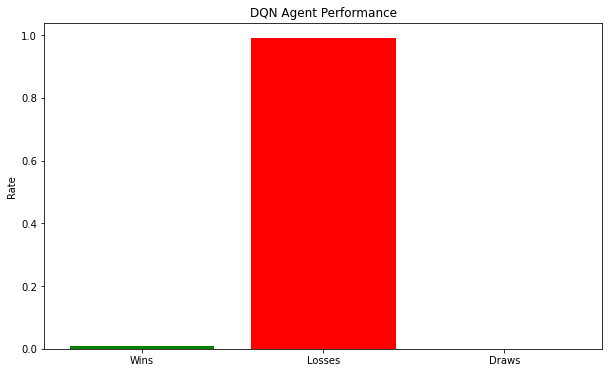

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Number of episodes to play
episodes = 100

# Trackers for outcomes
wins = 0
losses = 0
draws = 0

# Track rewards and steps
rewards = []
steps_per_episode = []

for episode in range(episodes):
    game = TicTacToe()  # Initialize a new game instance for each episode
    result = play_game(agent_for_playing, game, verbose=False)
    
    # Track the outcome
    if result == 'X':  # Assuming 'X' is the DQN agent
        wins += 1
    elif result == 'O':  # Assuming 'O' is the opponent
        losses += 1
    else:
        draws += 1
    
    # Optionally, you can track rewards and steps here if your `play_game` function returns those

# Calculate win/loss/draw rates
win_rate = wins / episodes
loss_rate = losses / episodes
draw_rate = draws / episodes

# Visualization
plt.figure(figsize=(10, 6))
labels = ['Wins', 'Losses', 'Draws']
rates = [win_rate, loss_rate, draw_rate]
plt.bar(labels, rates, color=['green', 'red', 'blue'])
plt.title('DQN Agent Performance')
plt.ylabel('Rate')
plt.show()
